In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns

In [2]:
df = pd.read_csv("AllCellTraces.csv")

In [3]:
df

,AWCL,BAGR,AUAL,BAGL,AIB?,RMEL,MI,RMED,RID,URAVL,...,NSMR,AWAL-alt.1,URADR,OLQDR,IL1R,SMDDR,OLQDL.2,UNKNOWN.6,UNKNOWN.7,IL1L
0,0.586039,1.459517,3.088314,1.627933,2.692174,1.179009,3.448392,0.196052,0.336361,0.873685,...,0.362817,4.929242,4.752723,2.999668,2.467353,0.415407,1.026994,0.975544,-0.865381,0.971275
1,0.622373,1.566628,2.246188,0.938111,2.091456,2.033810,1.911435,0.044773,0.336198,1.339640,...,0.249445,4.928750,3.812017,1.264649,1.536524,1.220786,0.335348,0.557270,-0.766435,0.591188
2,0.660878,0.496426,1.456195,0.635448,2.150354,2.650430,1.192220,-0.177939,-0.091339,1.518287,...,-0.126152,4.928258,3.573890,1.943154,2.087613,1.357984,0.811209,1.090883,-0.742480,-0.368318
3,0.701754,0.258985,1.466917,0.239395,1.947934,3.096737,0.836810,-0.178760,0.350934,1.075751,...,-0.167918,4.927767,3.857895,1.620214,1.671488,0.366340,0.246353,0.195866,-0.726421,0.244615
4,0.745228,1.433899,1.713918,0.207519,1.364337,1.929720,0.839314,-0.347872,0.663137,0.737163,...,-0.213998,4.927275,3.268509,0.484680,2.636286,0.270869,-0.276939,0.703682,-0.567303,0.234517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2.588940,-1.338013,-1.463107,1.513914,0.265134,-0.694350,-0.119329,0.949280,-0.475135,0.307584,...,-0.475404,0.079371,-0.663447,-1.749177,0.891777,-0.853818,-0.601317,2.049371,-1.016078,0.051408
1596,2.408233,-1.846172,-1.501472,1.410756,-0.128505,-0.474375,-0.483371,0.947308,-0.733144,-0.059216,...,-0.216479,0.309915,-0.781798,-1.838405,0.771680,-0.171521,-0.574696,3.075520,-1.004867,0.346790
1597,2.222620,-1.167381,-1.420474,1.238223,-0.561460,-0.223238,-1.124717,1.059257,-0.998655,-0.647839,...,-0.113755,0.519923,-0.857738,-1.921459,0.602081,-0.804011,-0.423408,3.333775,-1.011512,0.195078
1598,2.031429,-1.281412,-1.517951,1.412318,-0.597799,-0.005861,-0.790648,1.326089,-0.164685,-0.364548,...,-0.037921,-0.577380,-0.877535,-1.998957,0.751142,-0.844332,-0.221259,3.547179,-0.991946,-0.362942


In [4]:
df_sleep = pd.concat([df.iloc[640:801], df.iloc[1390:1481]]).reset_index(drop = True)
df_wake = df.drop(df.index[list(range(640, 801)) + list(range(1390, 1481))]).reset_index(drop = True)

In [5]:
df_sleep

,AWCL,BAGR,AUAL,BAGL,AIB?,RMEL,MI,RMED,RID,URAVL,...,NSMR,AWAL-alt.1,URADR,OLQDR,IL1R,SMDDR,OLQDL.2,UNKNOWN.6,UNKNOWN.7,IL1L
0,-0.674350,-1.581737,-0.680817,-1.273663,0.368581,-0.553656,-0.905212,-0.023366,-0.660192,-0.715112,...,-0.996326,-0.953519,0.793743,0.206998,-0.485105,-0.081087,-1.189177,-0.629454,0.091486,-0.516715
1,-0.903763,-1.472706,-0.512034,-1.328999,0.693251,0.263056,-1.112265,0.079659,-0.411551,-0.861948,...,-0.890606,-1.431175,0.886172,0.508670,-0.460893,-1.049687,-1.049567,-0.604471,0.069354,-1.042525
2,-0.807374,-0.057971,-1.083338,-1.038608,0.367046,0.699388,-1.163682,-0.013144,-0.421710,-0.812447,...,-0.876268,-0.611513,0.945154,-0.254703,-0.830867,-0.097270,-0.904924,-0.814425,-0.129139,-0.972305
3,-0.722969,-1.037592,-0.751973,-1.368517,-0.106658,-0.024538,-0.815523,-0.170078,-0.279375,-1.067840,...,-0.822221,-0.902209,1.300843,-0.114739,-0.753783,1.675735,-0.754970,-0.901392,-0.068346,-0.246181
4,-0.825289,-0.656063,-0.843284,-1.723741,-0.170331,0.455371,-0.625286,-0.177897,-0.914185,-0.501776,...,-0.745595,-0.683690,1.637469,0.285777,-0.315354,-0.097429,-1.950850,-1.047039,-0.088960,-0.286978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.013174,-0.802040,-1.653534,-1.346903,0.059236,-0.449626,-1.249309,-0.846606,-0.585893,-0.419029,...,-0.793274,1.968580,-1.076734,0.271585,1.430610,-0.162348,-0.095337,-0.447317,0.768681,0.668889
248,0.073237,-0.371833,-1.698031,-1.268270,-0.462109,-0.438964,-0.744039,-0.755754,-0.777711,-0.363254,...,-0.719324,0.959596,-1.142459,0.403244,0.907986,-0.162425,-0.535167,-0.520968,0.838867,0.367024
249,-0.056153,0.410676,-1.884270,-1.377508,-0.575643,-0.468516,-1.128506,-0.631928,-0.584486,-0.265287,...,-0.821497,0.669552,-1.023292,0.079786,1.658166,-0.162502,-2.094106,-0.738340,0.902079,0.276598
250,0.073583,-0.312537,-1.971295,-1.401255,-0.713411,-0.498065,-1.477031,-0.796392,-0.541860,-0.172611,...,-0.972585,0.657178,-1.070088,-0.211319,1.517139,-0.162578,-1.078152,-0.994555,0.959303,0.348593


In [6]:
df_wake

,AWCL,BAGR,AUAL,BAGL,AIB?,RMEL,MI,RMED,RID,URAVL,...,NSMR,AWAL-alt.1,URADR,OLQDR,IL1R,SMDDR,OLQDL.2,UNKNOWN.6,UNKNOWN.7,IL1L
0,0.586039,1.459517,3.088314,1.627933,2.692174,1.179009,3.448392,0.196052,0.336361,0.873685,...,0.362817,4.929242,4.752723,2.999668,2.467353,0.415407,1.026994,0.975544,-0.865381,0.971275
1,0.622373,1.566628,2.246188,0.938111,2.091456,2.033810,1.911435,0.044773,0.336198,1.339640,...,0.249445,4.928750,3.812017,1.264649,1.536524,1.220786,0.335348,0.557270,-0.766435,0.591188
2,0.660878,0.496426,1.456195,0.635448,2.150354,2.650430,1.192220,-0.177939,-0.091339,1.518287,...,-0.126152,4.928258,3.573890,1.943154,2.087613,1.357984,0.811209,1.090883,-0.742480,-0.368318
3,0.701754,0.258985,1.466917,0.239395,1.947934,3.096737,0.836810,-0.178760,0.350934,1.075751,...,-0.167918,4.927767,3.857895,1.620214,1.671488,0.366340,0.246353,0.195866,-0.726421,0.244615
4,0.745228,1.433899,1.713918,0.207519,1.364337,1.929720,0.839314,-0.347872,0.663137,0.737163,...,-0.213998,4.927275,3.268509,0.484680,2.636286,0.270869,-0.276939,0.703682,-0.567303,0.234517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,2.588940,-1.338013,-1.463107,1.513914,0.265134,-0.694350,-0.119329,0.949280,-0.475135,0.307584,...,-0.475404,0.079371,-0.663447,-1.749177,0.891777,-0.853818,-0.601317,2.049371,-1.016078,0.051408
1344,2.408233,-1.846172,-1.501472,1.410756,-0.128505,-0.474375,-0.483371,0.947308,-0.733144,-0.059216,...,-0.216479,0.309915,-0.781798,-1.838405,0.771680,-0.171521,-0.574696,3.075520,-1.004867,0.346790
1345,2.222620,-1.167381,-1.420474,1.238223,-0.561460,-0.223238,-1.124717,1.059257,-0.998655,-0.647839,...,-0.113755,0.519923,-0.857738,-1.921459,0.602081,-0.804011,-0.423408,3.333775,-1.011512,0.195078
1346,2.031429,-1.281412,-1.517951,1.412318,-0.597799,-0.005861,-0.790648,1.326089,-0.164685,-0.364548,...,-0.037921,-0.577380,-0.877535,-1.998957,0.751142,-0.844332,-0.221259,3.547179,-0.991946,-0.362942


In [7]:
# Wilcoxon Rank Sum Test
results = []

for column in df_wake.columns:
    stat, p_value = mannwhitneyu(df_wake[column], df_sleep[column])
    is_significant = p_value < 0.05
    results.append({'Column': column, 'p_value': p_value, 'Significant': is_significant})
    
results_df = pd.DataFrame(results)

In [8]:
results_df

,Column,p_value,Significant
0,AWCL,1.549970e-25,True
1,BAGR,8.611544e-22,True
2,AUAL,3.725078e-05,True
3,BAGL,1.204426e-106,True
4,AIB?,1.420904e-06,True
...,...,...,...
147,SMDDR,1.926536e-02,True
148,OLQDL.2,1.102149e-45,True
149,UNKNOWN.6,1.961351e-47,True
150,UNKNOWN.7,2.886656e-42,True


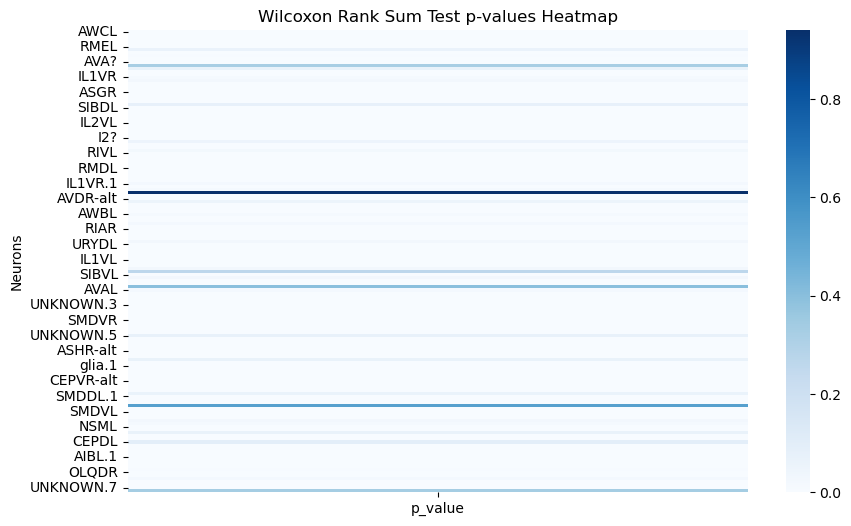

In [9]:
heatmap_data = results_df.set_index('Column')

plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data[['p_value']], cmap = 'Blues')

plt.title('Wilcoxon Rank Sum Test p-values Heatmap')
plt.ylabel('Neurons')
plt.show()

From this line I only include some specific neurons

In [12]:
columns_to_show = ['AVA?', 'AVAL', 'AIB?', 'AIBL', 'AIB?-alt']
df_filtered = df[columns_to_show]

In [13]:
df_sleep_filtered = pd.concat([df_filtered.iloc[640:801], df_filtered.iloc[1390:1481]]).reset_index(drop = True)
df_wake_filtered = df_filtered.drop(df_filtered.index[list(range(640, 801)) + list(range(1390, 1481))]).reset_index(drop = True)

In [14]:
# Wilcoxon Rank Sum Test
results_filtered = []

for column in df_sleep_filtered.columns:
    stat, p_value = mannwhitneyu(df_wake_filtered[column], df_sleep_filtered[column])
    is_significant = p_value < 0.05
    results_filtered.append({'Column': column, 'p_value': p_value, 'Significant': is_significant})
    
results_df_filtered = pd.DataFrame(results_filtered)

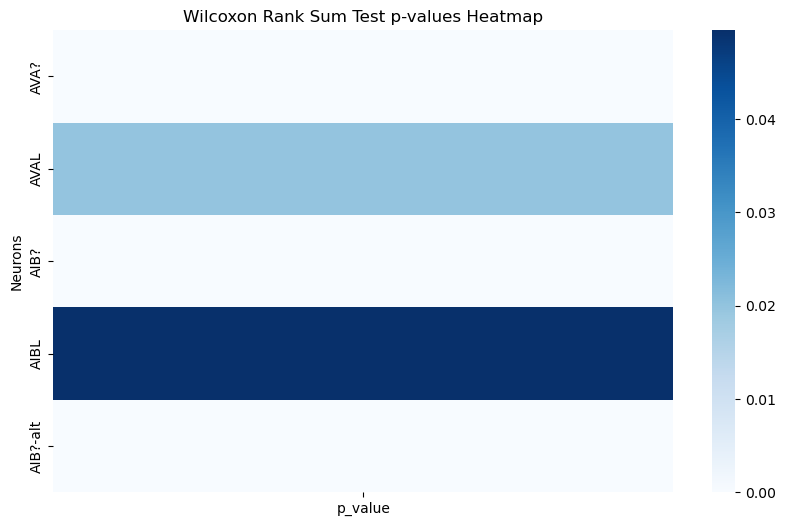

In [15]:
heatmap_data = results_df_filtered.set_index('Column')

plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data[['p_value']], cmap = 'Blues')

plt.title('Wilcoxon Rank Sum Test p-values Heatmap')
plt.ylabel('Neurons')
plt.show()